In [1]:
from sklearn.datasets import make_regression

In [2]:
X, y = make_regression(n_samples=150, n_features=1, noise=50, random_state=42)

In [11]:
type(X)

numpy.ndarray

In [3]:
X.shape, y.shape

((150, 1), (150,))

Text(0.5, 1.0, 'Dataset')

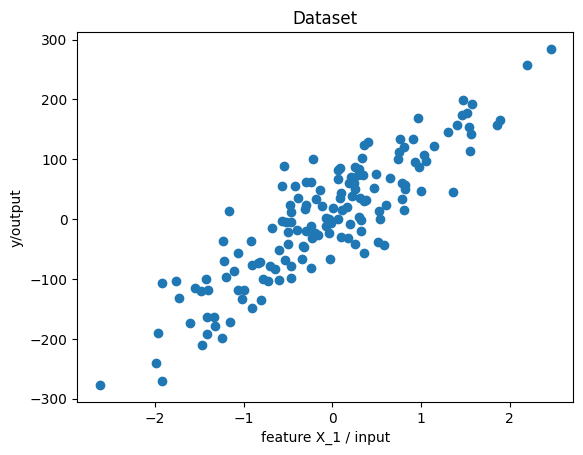

In [4]:
import matplotlib.pyplot as plt

plt.scatter(X, y)
plt.xlabel("feature X_1 / input")
plt.ylabel("y/output")
plt.title("Dataset")

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)
X_train.shape

(120, 1)

# Model

In [6]:
import numpy as np

In [7]:
class LinearReg:

    def __init__(self, lr = 0.01, epochs = 100):
        self.lr = lr
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):

        m, n = X.shape

        self.weights = np.random.rand(n, 1)
        self.bias = np.random.rand(1)

        y = y.reshape(m, 1)

        losses = list()
        b_list = list()
        w_list = list()

        for epoch in range(self.epochs):

            # calculate prediction
            y_hat = np.dot(X, self.weights) + self.bias

            # get loss - L - J
            loss = np.mean((y - y_hat)**2) # MSE
            losses.append(loss)

            # calculate gradient
            dw = (-2 / m) * np.dot(X.T, (y - y_hat))
            db = (-2 / m) * np.sum((y - y_hat))

            # update params
            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db

            w_list.append(self.weights)
            b_list.append(self.bias)

            # print(f"epoch: {epoch}, loss: {loss}, w: {self.weights}, b: {self.bias}")

        return self.weights, self.bias, losses, b_list, w_list
    
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

In [8]:
model = LinearReg()
w, b, losses, b_list, w_list = model.fit(X_train, y_train)

Text(0, 0.5, 'loss')

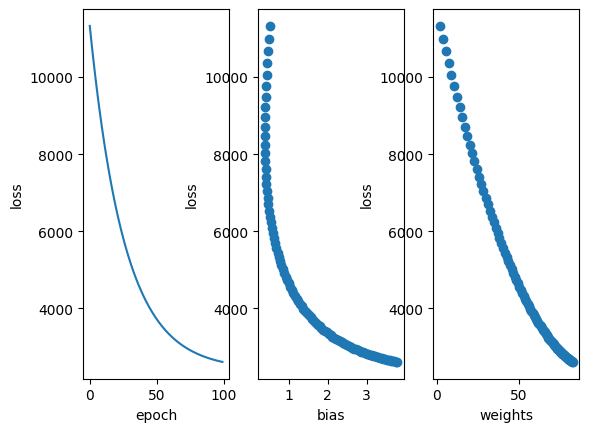

In [9]:
plt.subplot(1, 3, 1)
plt.plot(np.arange(len(losses)), losses)
plt.xlabel("epoch")
plt.ylabel("loss")

plt.subplot(1, 3, 2)
plt.scatter(b_list, losses)
plt.xlabel("bias")
plt.ylabel("loss")

plt.subplot(1, 3, 3)
plt.scatter(w_list, losses)
plt.xlabel("weights")
plt.ylabel("loss")

In [10]:
model.predict(X_test)

array([[ -49.46311722],
       [ -20.89295705],
       [ -62.94895868],
       [  37.14161595],
       [-118.25705546],
       [-138.5960222 ],
       [  83.74654728],
       [ -79.81618312],
       [  18.19955684],
       [  28.30374139],
       [  52.23152145],
       [  80.66223031],
       [ -62.43582582],
       [ -30.93367304],
       [ -94.95307925],
       [  64.74626305],
       [ -15.53952721],
       [  54.28024426],
       [  -2.15526633],
       [ -34.96431205],
       [  88.89365829],
       [ -71.27733257],
       [  65.85786352],
       [ 125.78296917],
       [  34.80120536],
       [   9.36305051],
       [ -21.73534007],
       [  -9.52460033],
       [ -21.06600175],
       [   0.83158135]])

# Work Items

- Ajustar el modelo con la mejor convergencia
- Obtener el MSE del testing
- Graficar el modelo sobre los datos